# Analysis of Test Set 1
This notebook allows for the analysis and reproduction of the figures associated with the scientific publication of this work.
Upon running this notebook, the figures will be produced and saved under `figures`.

In [86]:
import glob
import math
import os
import re
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist as axisartist
from matplotlib.pyplot import *
from matplotlib.font_manager import FontProperties

from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import host_subplot


 Define functions:

In [87]:
# Function to check if a value can be converted to a float.
def is_float(string: any) -> bool:
    if string is None:
        return False
    try:
        float(string)
        return True
    except ValueError:
        return False

# Function to extract all properties from an sdf file. (takes regex paths as input) 
def extract_properties_from_sdf(pathname):
    if not os.path.isfile(pathname):
        print("ERROR: file '%s' is missing!" % pathname)
        quit(1)
    pattern = re.compile("^> *<.*>$")
    all_values = {}
    with open(pathname, "r") as input_file:
        lines = input_file.readlines()
        for index, line in enumerate(lines):
            if pattern.match(line):
                property_name = re.split('<|>', line)[2]
                value_str = lines[index + 1].rstrip()
                if is_float(value_str):
                    all_values[property_name] = float(value_str)
                else:
                    all_values[property_name] = value_str
    return all_values

In [88]:
# Collect paths to all the sdf files of test set 1 in 'pathnames' variable.
pathnames = sorted(glob.glob('*/*_out.sdf'))
#print(pathnames)

In [89]:
# create dataframe with the descriptors, wights and fitness data.
mols = []
for mol in pathnames:
    if not extract_properties_from_sdf(mol)['NAME'] == 'H14':
        mols.append(extract_properties_from_sdf(mol))
df = pd.DataFrame(mols)

#sort df by the values in 'FITNESS'
sorted_index_1 = df['FITNESS'].sort_values().index
df_sorted = df.loc[sorted_index_1]
df_sorted.set_index('NAME', inplace=True)

rows_descriptors=['DESCRIPTOR_1', 'DESCRIPTOR_2', 'DESCRIPTOR_3', 'FITNESS']
rows_weights=['WEIGHT_1', 'WEIGHT_2', 'WEIGHT_3', 'WEIGHT_4']
descriptors_df=df_sorted[rows_descriptors]
weights_df=df_sorted[rows_weights]


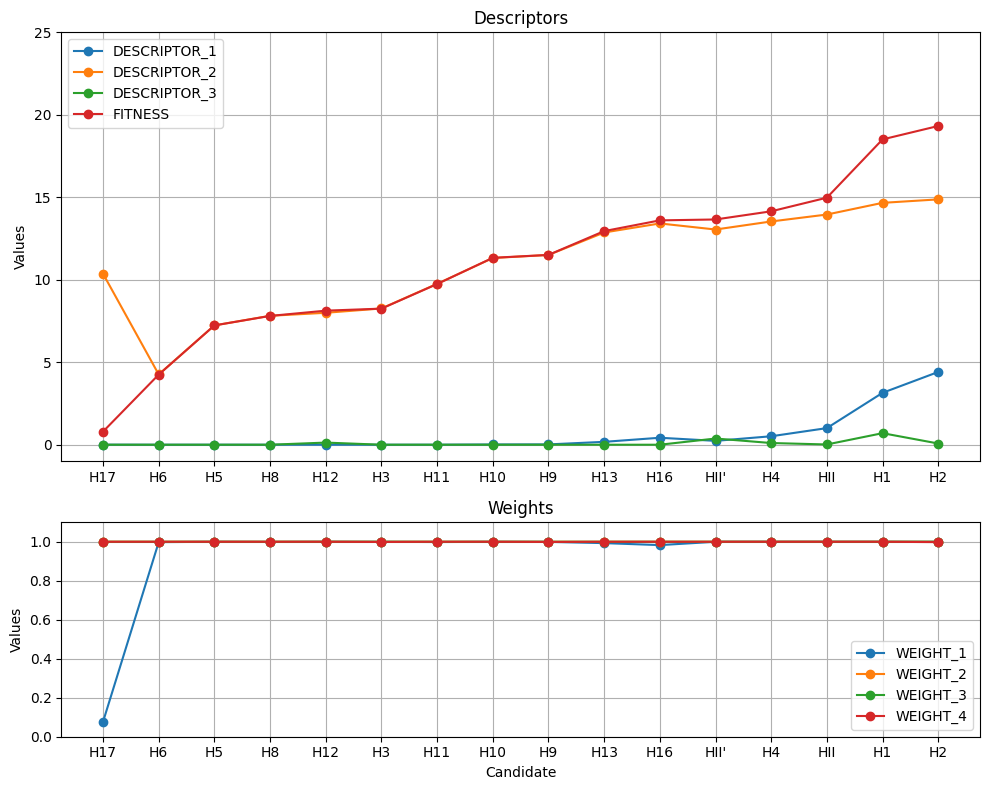

In [91]:
# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [2, 1]})

# First subplot
for column in descriptors_df.columns:
    axs[0].plot(descriptors_df.index, descriptors_df[column], marker='o', label=column)
axs[0].set_xlabel('')
axs[0].set_ylabel('Values')
axs[0].set_title('Descriptors')
axs[0].set_ylim(-1, 25)  # Set y-axis range
axs[0].legend()
axs[0].grid(True)

# Second subplot
for column in weights_df.columns:
    axs[1].plot(weights_df.index, weights_df[column], marker='o', label=column)
axs[1].set_xlabel('Candidate')
axs[1].set_ylabel('Values')
axs[1].set_title('Weights')
axs[1].set_ylim(0, 1.1)  # Set y-axis range
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()